In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection

In [2]:
data = datasets.load_boston()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
y = data.target

In [29]:
correlations = []

In [30]:
for feature in data.feature_names:
    correlation = np.corrcoef(X[feature], y)[0, 1]
    correlations.append(correlation)

In [31]:

correlations_plot = pd.Series(correlations, index=data.feature_names).sort_values()

([<matplotlib.axis.YTick at 0x7fcaa7dc5d30>,
 <a list of 13 Text yticklabel objects>)

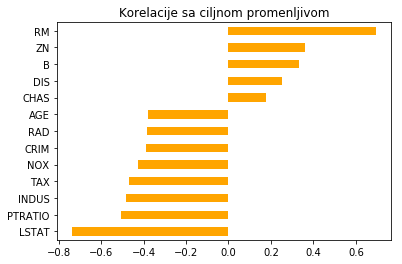

In [32]:
correlations_plot.plot(kind = 'barh', color = 'orange')
plt.title('Korelacije sa ciljnom promenljivom')
plt.yticks(np.arange(13), correlations_plot.index)

In [23]:
correlations_filtering = np.array(correlations)

In [26]:
correlations_filtering[np.abs(correlations_filtering)>0.5]

array([ 0.69535995, -0.50778669, -0.73766273])

In [36]:
correlations_plot[np.abs(correlations_plot)>0.5]

LSTAT     -0.737663
PTRATIO   -0.507787
RM         0.695360
dtype: float64

In [37]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


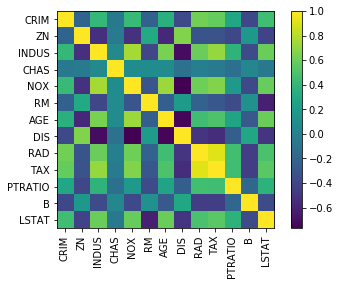

In [40]:
plt.imshow(X.corr())
plt.xticks(np.arange(13), data.feature_names, rotation='vertical')
plt.yticks(np.arange(13), data.feature_names)

plt.colorbar()

In [44]:
def strong_correlation(value):
    if value > 0.7:
        return value
    return False

In [45]:
X.corr().applymap(strong_correlation)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,1,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,1,False,0.763651,False,False,False,False,0.72076,False,False,False
CHAS,False,False,False,1,False,False,False,False,False,False,False,False,False
NOX,False,False,0.763651,False,1,False,0.73147,False,False,False,False,False,False
RM,False,False,False,False,False,1,False,False,False,False,False,False,False
AGE,False,False,False,False,0.73147,False,1,False,False,False,False,False,False
DIS,False,False,False,False,False,False,False,1,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,1,0.910228,False,False,False
TAX,False,False,0.72076,False,False,False,False,False,0.910228,1,False,False,False


In [46]:
X[['LSTAT', 'PTRATIO', 'RM']].corr()

,LSTAT,PTRATIO,RM
LSTAT,1.000000,0.374044,-0.613808
PTRATIO,0.374044,1.000000,-0.355501
RM,-0.613808,-0.355501,1.000000


In [48]:
model = linear_model.LinearRegression()

In [52]:
rfe = feature_selection.RFE(model, 10, 1, verbose=1)

In [53]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7)

In [54]:
rfe.fit(X_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=1)

In [55]:
rfe.ranking_

array([1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1])

In [56]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [57]:
data.feature_names[rfe.support_]

array(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'], dtype='<U7')

In [58]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)